
<h2  >Sentement analysis</h2>

<p>Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.</p>

<p>Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks :</p>

<ul>
    <li><p>Tokenizing the string</p></li>
    <li><p>Lowercasing</p></li>
    <li><p>Removing stop words and punctuation</p></li>
    <li><p>Stemming</p></li>
    <li><p>Sequential modelling</p></li>
 </ul>


<h3>Importing the packages</h3>

In [3]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import nltk
from nltk.corpus import twitter_samples
import random
nltk.download('stopwords')
import string   
from tensorflow.keras.preprocessing.text import Tokenizer                        
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Loading the data</h3>


In [4]:
tweets = pd.read_csv("Twitter_Data.csv")

In [5]:
tweets['clean_text']=tweets['clean_text'].astype('str')
tweets.head(10)


clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
5           kiya tho refresh maarkefir comment karo        0.0
6  surat women perform yagna seeks divine grace f...       0.0
7  this comes from cabinet which has scholars lik...       0.0
8  with upcoming election india saga going import...       1.0
9                         gandhi was gay does modi         1.0

<h3> Dropping Nan Values</h3>
    

In [6]:
# As we have very few null values so we can drop that
print(tweets.isnull().sum())
tweets=tweets.dropna()


clean_text    0
category      7
dtype: int64


<h3>Data Visualization</h3>


In [7]:
all_positive_tweets=tweets[tweets['category']==1]['clean_text']
all_neutral_tweets=tweets[tweets['category']==0]['clean_text']
all_negative_tweets=tweets[tweets['category']==-1]['clean_text']

<h3 >Interpreting nature of tweet with length of the tweet</h3>

In [8]:
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))
    
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))
    
import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [9]:
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))
    
import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()


In [10]:
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))
    
total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))
    
import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

<AxesSubplot:xlabel='category', ylabel='count'>

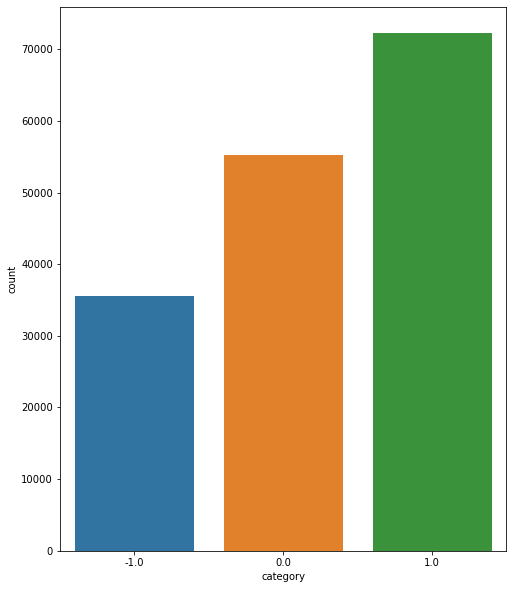

In [11]:
plt.figure(figsize=(8,10))
sns.countplot(x=tweets['category'])

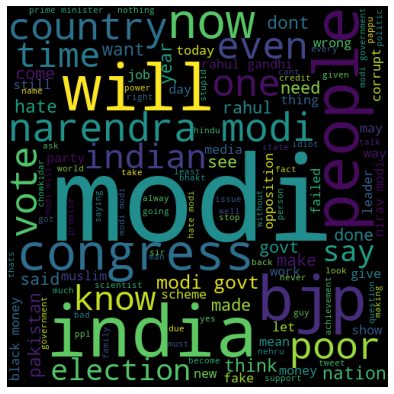

In [14]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
positive_wc = wc.generate(tweets[tweets['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(tweets[tweets['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(tweets[tweets['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (10, 7))
plt.axis('off')
plt.imshow(positive_wc)

(-0.5, 499.5, 499.5, -0.5)

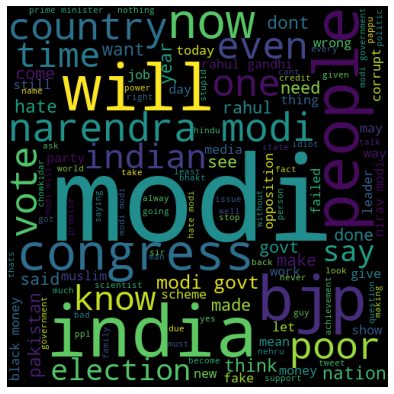

In [15]:
plt.figure(figsize = (10, 7))
plt.imshow(negative_wc)
plt.axis('off')

In [16]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

<h3 >Removing StopWords and Punctuations</h3>

In [17]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [18]:
tweets=tweets.dropna(axis=0)

In [19]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

In [20]:
# Removing Stopwords
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))

In [21]:
tweets['clean_text'][0]

'modi promised “minimum government maximum governance” expected begin difficult job reforming state take years get justice state business exit psus temples'

In [22]:
# removing punctuations
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [23]:
tweets['clean_text'][0]

'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

<h3>Stemming The Words</h3>

In [24]:
stemmer = PorterStemmer() 
def stemming(word):
    list1=[]
    for i in word.split():
        list1.append(stemmer.stem(i))
    return ' '.join(list1)
    
tweets['clean_text'] = tweets['clean_text'].apply(lambda x:stemming(x))

In [25]:
tweets['category'] = [2 if x == -1 else x for x in tweets['category']]

In [26]:
tweets_2=tweets.copy()

<h3 >Tokenizing the words</h3>

In [27]:
tweets

clean_text  category
0       modi promis minimum govern maximum govern expe...       2.0
1                    talk nonsens continu drama vote modi       0.0
2       say vote modi welcom bjp told rahul main campa...       1.0
3       ask support prefix chowkidar name modi great s...       1.0
4       answer among power world leader today trump pu...       1.0
...                                                   ...       ...
162975  456 crore paid neerav modi recov congress lead...       2.0
162976  dear rss terrorist payal gawar modi kill 1000 ...       2.0
162977                          cover interact forum left       0.0
162978  big project came india modi dream project happ...       0.0
162979  ever listen like gurukul disciplin maintain ev...       1.0

[162973 rows x 2 columns]

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets.clean_text)
word_index = tokenizer.word_index

In [29]:
# tokenizer
import pickle

# saving
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer1.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [30]:
tweets.clean_text


0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162975    456 crore paid neerav modi recov congress lead...
162976    dear rss terrorist payal gawar modi kill 1000 ...
162977                            cover interact forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul disciplin maintain ev...
Name: clean_text, Length: 162973, dtype: object

In [33]:
tweets.clean_text

0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162975    456 crore paid neerav modi recov congress lead...
162976    dear rss terrorist payal gawar modi kill 1000 ...
162977                            cover interact forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul disciplin maintain ev...
Name: clean_text, Length: 162973, dtype: object

In [34]:
vocab_size = len(word_index)+1

<h3 >Padding the tweets </h3>|

In [35]:
# padding the tokenized sequences to same length
max_length = 200
lines = pad_sequences(tokenizer.texts_to_sequences(tweets.clean_text),
                        maxlen = max_length)


In [36]:
tweets.clean_text = lines.tolist()


In [37]:
tweets.clean_text


0         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                ...                        
162975    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162976    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162977    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162978    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162979    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: clean_text, Length: 162973, dtype: object

In [38]:
tweets.category.value_counts()

1.0    72250
0.0    55213
2.0    35510
Name: category, dtype: int64

In [39]:
tweets.head()

clean_text  category
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       2.0
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0.0
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0

In [40]:
tweets.isnull().sum()

clean_text    0
category      0
dtype: int64

<h3 >Splitting the data</h3>

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tweets['clean_text'],tweets['category'],test_size=0.2,random_state=101)
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)



<h3 >Data Modelling</h3>

<Center><img src="https://miro.medium.com/max/875/1*SICYykT7ybua1gVJDNlajw.png" width="700" /></Center>

<h3>Sequential Modelling</h3>

In [42]:


model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='relu'))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         17711000  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                67840     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 17,783,195
Trainable params: 17,783,195
Non-trainable params: 0
_________________________________________________________________


<h3 >Adding Optimizer,loss function and Training the Model</h3>

In [45]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=2, batch_size=512,
                    verbose=1,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/2
255/255 [==============================] - 637s 2s/step - loss: 0.5442 - accuracy: 0.7932 - val_loss: 0.4108 - val_accuracy: 0.8547
Epoch 2/2
255/255 [==============================] - 603s 2s/step - loss: 0.3484 - accuracy: 0.8793 - val_loss: 0.4136 - val_accuracy: 0.8506


<h3> Save Model </h3>

In [ ]:
from keras.models import load_model
model.save("model_lstm.h5")


<h3 >Accuracy and Loss of Test data</h3>

In [46]:
predictions = model.predict(X_val)
print(history.history)


{'loss': [0.5442036390304565, 0.3483958840370178], 'accuracy': [0.7931706309318542, 0.879297137260437], 'val_loss': [0.41080719232559204, 0.41358160972595215], 'val_accuracy': [0.8546709418296814, 0.8505905866622925]}


In [47]:
predictions.shape

(32595, 3)

<h3 >Model Evaluvation</h3>

In [48]:
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
255/255 [==============================] - 46s 182ms/step - loss: 0.4136 - accuracy: 0.8506
test loss, test acc: [0.4135817587375641, 0.8505905866622925]


<h3 >Accuracy is 85% </h3>